In [1]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np

In [2]:
# Show DataFrame info.
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

tips=pd.read_excel('marketing_customer_analysis.xlsx', index_col=0) 
display(tips.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0.0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1.0,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2.0,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3.0,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4.0,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
# Describe DataFrame.

tips.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
tips.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
Vehicle Type                        1
dtype: int64

In [6]:
data=tips.drop(['Customer', 'State', 'Customer Lifetime Value', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type',
       'Vehicle Class', 'Vehicle Type','Vehicle Size'], axis=1)

In [7]:
data

,Response,Income,Sales Channel,Total Claim Amount
0.0,No,48029.0,Agent,292.800000
1.0,No,0.0,Call Center,744.924331
2.0,No,22139.0,Call Center,480.000000
3.0,Yes,49078.0,Branch,484.013411
4.0,No,23675.0,Branch,707.925645
...,...,...,...,...
10905.0,No,0.0,Web,1214.400000
10906.0,No,61146.0,Branch,273.018929
10907.0,No,39837.0,Web,381.306996
10908.0,No,64195.0,Branch,618.288849


<AxesSubplot:>

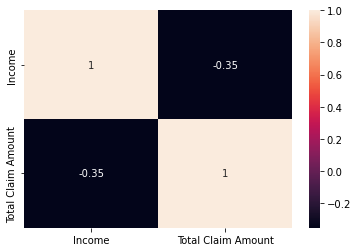

In [43]:
corelation=data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns ,annot=True)

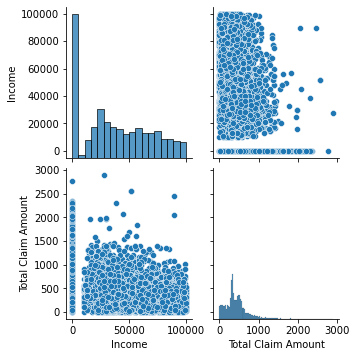

In [41]:
sns.pairplot(data)

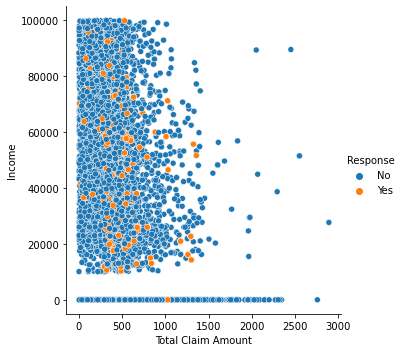

In [45]:
sns.relplot(x='Total Claim Amount', y='Income', hue='Response',  data=data)

In [38]:
print(data.loc[:,'Response'])

0.0         No
1.0         No
2.0         No
3.0        Yes
4.0         No
          ... 
10905.0     No
10906.0     No
10907.0     No
10908.0     No
10909.0    NaN
Name: Response, Length: 10910, dtype: object


<AxesSubplot:>

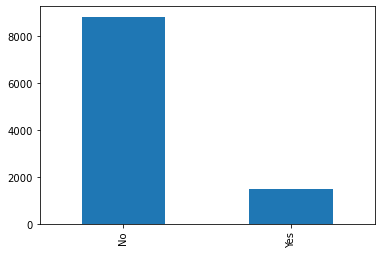

In [40]:
# Show a plot of the total number of responses.

data['Response'].value_counts().plot(kind='bar')

<AxesSubplot:>

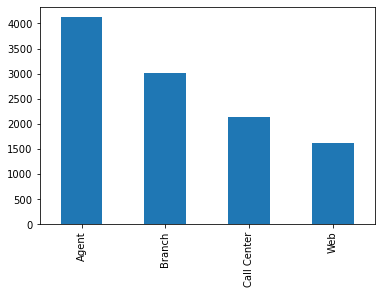

In [48]:
# Show a plot of the response rate by the sales channel.

data['Sales Channel'].value_counts().plot(kind='bar')

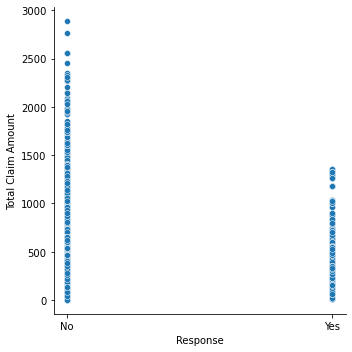

In [30]:
# Show a plot of the response rate by the total claim amount.

sns.relplot(x='Response', y='Total Claim Amount', data=data)

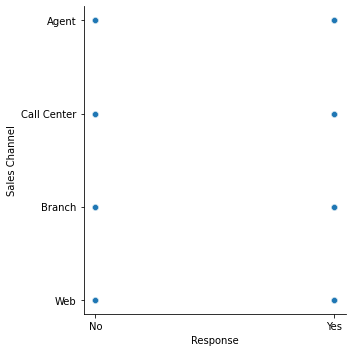

In [29]:
sns.relplot(x='Response', y='Sales Channel', data=data)

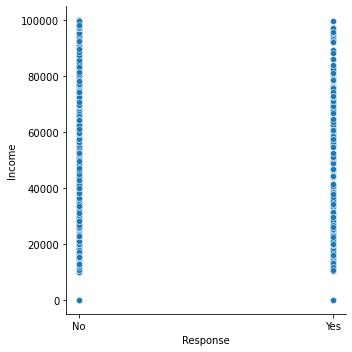

In [34]:
# Show a plot of the response rate by income.
sns.relplot(x='Response', y='Income', data=data)